In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D,Activation,BatchNormalization,Dense,Flatten,Conv2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import  to_categorical
from  IPython import display

%matplotlib inline

In [5]:
img_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = img_gen_train.flow_from_directory('../data/flowers',
                          batch_size = 8,
                                  seed =42,
                                  target_size = (128,128),
                        subset = 'training' 
                                 )
val_data = img_gen_train.flow_from_directory('../data/flowers',
                          batch_size = 8,
                                  seed =42,
                                  target_size = (128,128),
                                subset = 'validation' )

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [6]:
def create_simple_cov():    
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    return model

model = create_simple_cov()
    # Compile model
model.compile(optimizer = 'adam',
             loss ='categorical_crossentropy',metrics = ['accuracy'])

In [22]:
model.fit(train_data, validation_data=val_data, epochs=3, batch_size=16, verbose=2)


Epoch 1/3
433/433 - 92s - loss: 1.2453 - accuracy: 0.4899 - val_loss: 1.0993 - val_accuracy: 0.5470
Epoch 2/3
433/433 - 36s - loss: 0.9800 - accuracy: 0.6251 - val_loss: 1.1187 - val_accuracy: 0.5470
Epoch 3/3
433/433 - 38s - loss: 0.7967 - accuracy: 0.6938 - val_loss: 1.1709 - val_accuracy: 0.5343


### انتخاب نرخ یادگیری

In [11]:
lr_schedule  = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate = 1,
    staircase= False

)


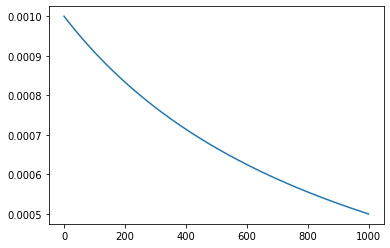

In [27]:
plt.plot(range(0,1000),lr_schedule(range(0,1000)))


In [28]:

model = create_simple_cov()
# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
             loss ='categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
model.fit(train_data, validation_data=val_data, epochs=10, batch_size=16,
          callbacks=[tf.keras.callbacks.TensorBoard('logs')],
          verbose=1)

Epoch 1/10
433/433 [==============================] - 39s 90ms/step - loss: 1.2678 - accuracy: 0.4682 - val_loss: 1.2441 - val_accuracy: 0.4739
Epoch 2/10
433/433 [==============================] - 40s 92ms/step - loss: 0.9914 - accuracy: 0.6023 - val_loss: 1.2252 - val_accuracy: 0.5192
Epoch 3/10
433/433 [==============================] - 37s 85ms/step - loss: 0.8140 - accuracy: 0.6837 - val_loss: 1.1184 - val_accuracy: 0.5587
Epoch 4/10
433/433 [==============================] - 38s 88ms/step - loss: 0.6711 - accuracy: 0.7565 - val_loss: 1.0917 - val_accuracy: 0.5738
Epoch 5/10
433/433 [==============================] - 39s 90ms/step - loss: 0.5240 - accuracy: 0.8140 - val_loss: 1.1440 - val_accuracy: 0.5738
Epoch 6/10
433/433 [==============================] - 39s 90ms/step - loss: 0.3985 - accuracy: 0.8689 - val_loss: 1.2694 - val_accuracy: 0.5842
Epoch 7/10
433/433 [==============================] - 39s 90ms/step - loss: 0.3105 - accuracy: 0.9053 - val_loss: 1.3848 - val_accuracy:

In [30]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir logs/sizes

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 27556.

In [33]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

In [14]:
model.save('models/custom_conv_mnist.h5')

### تنظیم سازی

##### تنظیم سازی وزن نورون های شبکه عصبی

##### اضافه کردن لایه حذف تصادفی

In [12]:
def create_simple_cov():    
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 3),kernel_regularizer = tf.keras.regularizers.l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(8, (2, 2), activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    return model

model = create_simple_cov()

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
             loss ='categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
model.fit(train_data, validation_data=val_data, epochs=10, batch_size=16,
          callbacks=[tf.keras.callbacks.TensorBoard('logs')],
          verbose=1)

Epoch 1/10
433/433 [==============================] - 37s 85ms/step - loss: 1.3755 - accuracy: 0.4209 - val_loss: 1.2805 - val_accuracy: 0.4762
Epoch 2/10
433/433 [==============================] - 27s 63ms/step - loss: 1.1090 - accuracy: 0.5633 - val_loss: 1.1238 - val_accuracy: 0.5563
Epoch 3/10
433/433 [==============================] - 30s 68ms/step - loss: 0.9453 - accuracy: 0.6453 - val_loss: 1.0657 - val_accuracy: 0.5854
Epoch 4/10
433/433 [==============================] - 26s 59ms/step - loss: 0.7540 - accuracy: 0.7302 - val_loss: 1.0127 - val_accuracy: 0.6051
Epoch 5/10
433/433 [==============================] - 25s 57ms/step - loss: 0.6010 - accuracy: 0.7955 - val_loss: 1.0502 - val_accuracy: 0.5993
Epoch 6/10
433/433 [==============================] - 24s 56ms/step - loss: 0.4775 - accuracy: 0.8339 - val_loss: 1.1714 - val_accuracy: 0.5923
Epoch 7/10
433/433 [==============================] - 22s 52ms/step - loss: 0.3683 - accuracy: 0.8876 - val_loss: 1.3719 - val_accuracy:

#### مقداردهی اولیه به وزن های شبکه

به صورت پیشفرض کراس از روش مقداردهی  Glorot برای مقداردهی وزن های شبکه استفاده می کند. می توانیم این رفتار را با آرگومان `kernel_initializer` تغییر دهیم.


به طور مثال می توانیم وزن های شبکه را با روش He تعیین کنیم.

`kernel_initializer = 'he_normal'`


In [ ]:
def create_simple_cov():    
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 3),kernel_regularizer = tf.keras.regularizers.l2(0.001),kernel_initializer = 'he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(8, (2, 2), activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.001),kernel_initializer = 'he_normal'
                    ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'),kernel_initializer = 'he_normal')
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    return model

model = create_simple_cov()

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
             loss ='categorical_crossentropy',
              metrics = ['accuracy'])

توابع فعال سازی ReLu فاقد مشکل نیستند. 

مثلا یک مشکل رایج توابع فعال سازی ReLu نورون های در حال مرگ است. یعنی برخی از نورون ها در طول فرآیند آموزش تغییری پیدا نمی کنند و خروجی آن ها به صوت ثابت برابر با 0 خواهد بود و دیگر گرادیان نزولی وزن های آن ها را نمی تواند به روز رسانی کند. برای حل این مشکل می توانیم از سایر توابع فعال سازی variant ReLU مثل Leaky ReLU استفاده کنیم.

در حقیقت طبق یافته بعضی از محققین یادگیری عمیق، این  توابع فعال سازی بهتر از ReLU عمل می کنند.



In [1]:
from tensorflow.keras.layers import ReLU,ELU

####

To recap: here are the most common ways to prevent overfitting in neural networks:

Get more training data.
Reduce the capacity of the network.
Add weight regularization.
Add dropout.
Two important approaches not covered in this guide are:

data-augmentation
batch normalization

#### شبکه Resnet

![](https://i.imgur.com/XwcnU5x.png)

![](https://i.imgur.com/ZyseLci.png)

In [12]:
tf.keras.backend.clear_session()

In [ ]:


def shortcut_block(X):
    X = conv_bn_relu(X)
    X = MaxPooling2D((2,2))(X)
def conv_bn_relu(X):
    X = Conv2D(filter_size,
                    kernel_size = (3,3),
                    strides = (1,1),
                    padding = (1,1),
                    kernel_initializer = "he_normal",
              kernel_regularizer = l2(1.e-4))(X)
    X = BatchNormalization(axis = 3)(X) #Channel axis
    X = Activation('relu')(X)
    return X
def residual_block(X,repetition)    
residual  = conv_bn_relu(X)
def resnet_blcoks(X,filter_size,stage):
    
    

    
    

In [ ]:
def build_resnet_18(input_shape, num_outputs):
    for block in range(num_blocks)

In [7]:
from tensorflow.keras.applications import ResNet50

model = ResNet50()
model.summary()    X  = conv_bn_relu(X)
    X_main = Conv2D(filter_size,
                    kernel_size = (3,3),
                    strides = (1,1),
                    padding = (1,1),
                    kernel_initializer = "he_normal")(X)
                   
    X_main = BatchNormalization(axis = 3)(X_main)
    X_main = Activation('relu')(X_main)
    
    
    X_main = Conv2D(filter_size,
                    kernel_size = (3,3),
                    strides = (1,1),
                    padding = (1,1),
                    kernel_initializer = glorot_uniform(seed = 0))(X_main)
                   
    X_main = BatchNormalization(axis = 3)(X_main)
    X_main = Activation('relu')(X_main)
    
     X_main = Conv2D(filter_size,
                    kernel_size = (3,3),
                    strides = (1,1),
                    padding = 'same',
                    kernel_initializer = glorot_uniform(seed = 0))(X_main)
                   
    X_main = BatchNormalization(axis = 3)(X_main)
    X_main = Activation('relu')(X_main)
    
    
    X_shortcut = Conv2D()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### نمایش شبکه عصبی ساخته شده

In [1]:
!pip install netron

https://github.com/lutzroeder/netron

In [2]:
import netron

In [15]:
netron.start('models/custom_conv_mnist.h5')

Serving 'models/custom_conv_mnist.h5' at http://localhost:8080


### منابع

https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035